# 4 Markov Chain

## Markov Chain

<!-- For a sequence of random variables $x_1,x_2,\dotsc$. If it has such property: given $x_s$, for arbitrary $t>s$, the conditional distribution $x_t|x_s$ is independent of $x_1,\dotsc,x_{s-1}$, then we say it is a Markov Chain. And this is known as the Markov property. -->

Define $\{x(t):\ t\in T\}$ is a collection of random variables ordered by time $t$ (stochastic process). If for any $t_1<t_2<\dotsc<t_n$, we have 

$$\mathbb P(x(t_n)|x(t_{n-1}),\dotsc,x(t_1))=\mathbb P(x(t_n)|x(t_{n-1})),$$

then we say $\{x(t):\ t\in T\}$ is a Markov process. And this is known as the Markov property.

Note that the distribution does not depend on the time $t$. Only the state matters.

<br>

In particular, when the time $t$ is discrete, we can assume it can be ordered by a sequence of integers $t=1,2,\dotsc$ and also the state space is discrete. Then we call it a Markov chain. The Markov property indicates that every current state only depends on the previous state.

### Joint Distribution

Consider a Markov chain $\{x_n:\ n\geqslant 0\}$. If each $x_i$ takes values in a finite set $S=\{s_1,\dotsc,s_N\}$, we can denote that $p_{ij}=\mathbb P\left(x(t_n)= s_j|x(t_{n-1})=s_{i}\right)=\mathbb P(s_j|s_i)$. Then the joint distribution of a sample path $x_0,x_1,\dotsc,x_n$ is given by
$$
\mathbb P(x_0,x_1,\dotsc,x_n) = \mathbb P(x_0)\cdot \prod_{k=1}^n p_{x_{k-1}x_k}.
$$

## Transition Matrix

Consider a Markov chain $\{x_n:\ n\geqslant 0\}$. If each $x_i$ takes values in a finite set $S=\{s_1,\dotsc,s_N\}$, we can denote that $p_{ij}=\mathbb P\left(x(t_n)= s_j|x(t_{n-1})=s_{i}\right)=\mathbb P(s_j|s_i)$. Together we can use a matrix $P\in\mathbb R^{N\times N}$ to represent the transition probability, where $P_{ij}=p_{ij}$. Such $P$ is called the transition matrix.

Clearly, the sum of each row of $P$ is $1$.

### Matrix Multiplication

Define $p_0= [\mathbb P(x_0=s_1),\dotsc,\mathbb P(x_0=s_N)]\in\mathbb R^{1\times N}$ to be a <font color=red>row vector</font>. Then we have

$$p_0 P^n = [\mathbb P(x_n=s_1),\dotsc,\mathbb P(x_n=s_N)]\quad\quad (n\in\mathbb N).$$

Moreover, if we define $p_{ij}^{(n)}$ to be the probability of going from state $i$ to state $j$ in $n$ steps. Then we have $p_{ij}^{(n)} = (P^n)_{ij}$.

**Theorem** For states $u,v,w$ (allowing repetition), we have inequality: $p_{uw}^{k+l}\geqslant p_{uv}^{(k)}p_{vw}^{(l)}$.

### States

We introduce several concepts.

* Absorbing State (吸收态): A state $i$ is called an absorbing state if $p_{ii}=1$.
* Accessibility (可达性): State $j$ is accessible from state $i$ if $p_{ij}^{(n)}>0$ for some $n\geqslant 0$. In this case, we write $i\to j$. If not, we write $i\not\to j$ if it is inaccessible.
* Communicate (连通): Two states $i$ and $j$ are said to communicate if $i\to j$ and $j\to i$. In this case, we write $i\leftrightarrow j$.
* Closed Set (闭集): Consider a set of states $S_1\subset S$. If for any $i\in S_1$ and $j\not\in S_1$, we have $i\not\to j$, then $S_1$ is called a closed set.
* Irreducibility (不可约性): A Markov chain is said to be irreducible if there is only one closed set, which is the whole state space $S$. In other words, any two states communicate.
* Period (周期): For $i\in S$, denote $d(i) = {\rm gcd}\left\{m\geqslant 1:\ p_{ii}^{(m)}> 0\right\}$. Call $d(i)$ is a period of state $i$ if $d(i)>1$. If $d(i)=1$, then we say state $i$ is aperiodic.


**Theorem** If $i\leftrightarrow j$, then $d(i)=d(j)$.

**Proof** Since $i\leftrightarrow j$, we may assume $p_{ij}^{(k)}>0$ and $p_{ji}^{(l)}>0$. Then, $p_{ii}^{(k+l)}\geqslant p_{ij}^{(k)}p_{ji}^{(l)}>0$. Therefore, $d(i)|(k+l)$. Also, for any $s$ such that $p_{jj}^{(s)}>0$, we have $p_{ii}^{(k+l+s)}\geqslant p_{ij}^{(k)}p_{jj}^{(s)}p_{ji}^{(l)}>0$. Therefore, $d(i)|(k+l+s)\ \Rightarrow\ d(i)|s$. 

This implies $d(i)$ is a common divisor of all such $s$, so $d(i)|d(j)$. Similarly, we can prove $d(j)|d(i)$. Therefore, $d(i)=d(j)$.


<br>

The theorem indicates that, for an irreducible Markov chain, the period of each state is the same. We say the irreducible Markov chain is aperiodic if and only if each state is aperiodic.

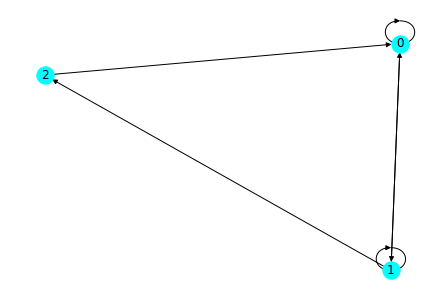

In [13]:
import numpy as np
import networkx as nx

transfer_matrix = [[1/3, 2/3, 0], [1/3, 1/2, 1/6], [1, 0, 0]]
G = nx.from_numpy_matrix(np.array(transfer_matrix), create_using=nx.DiGraph)
np.random.seed(0)
nx.draw(G, with_labels=True, node_color='cyan')

## Recurrence

### Recurrent State

For state $s_i$, if $\sum_{n=1}^\infty p_{ii}^{(n)}=\infty$, then we say state $s_i$ is recurrent (常返的). Otherwise, we say state $s_i$ is transient (瞬时的).

Now we assume $x_0= s_i$.

<br>

Define $T_i = \inf\{n\geqslant 1:\ x_n=x_0\}$, which is the first time that the chain returns to state $x_0=s_i$. Then $T_i$ is a random variable. Note that $T_i$ <font color=red>can be infinity</font>, indicating the chance that the chain never returns to state $s_i$.

Also, we define $f_{ii}^{(n)}$ the probability that the chain returns to state $i$ for the first time at time $n\geqslant 1$ given that it starts at state $i$. 


<!--  -->

### Recurrsion

By definition, $f_{ii}^{(n)}$, the probability of first returning at time $n$, is the probability of $p_{ii}^{(n)}$ minus the cases that it has returned before time $n$. As a consequence, we have $f_{ii}^{(n)} = p_{ii}^{(n)} - \sum_{k=1}^{n-1}f_{ii}^{(k)}p_{ii}^{(n-k)}$. 


Note that $p_{ii}^{(0)}=1$ and we have identity 

$$p_{ii}^{(n)} = \sum_{k=1}^{n}f_{ii}^{(k)}p_{ii}^{(n-k)}\quad\quad (n>0).$$


**Theorem** We have bound $\sum_{k=1}^M f_{ii}^{(k)} \leqslant 1$.

**Proof** 

$$\sum_{k=1}^M f_{ii}^{(k)} =\mathbb P({\rm has\ returned\ before\ time\ } M)\leqslant 1.$$

**Theorem** Define $F(x)= \sum_{n=1}^\infty f_{ii}^{(n)}x^n$ and $P(x) = \sum_{n=0}^\infty p_{ii}^{(n)}x^n$. Then $F(x)$ and $P(x)$ absolutely converges over $(-1,1)$. Also, we have relation $F(x) = \frac{P(x)}{1+P(x)}$ when $x\in (-1,1)$.

**Proof** $F(x)$ absolutely converges because $F(1)$ is bounded. We now consider $P(x)$. Note that $x^np_{ii}^{(n)}$ is the $(i,i)$-entry of matrix $(xP)^n$. Moreover, we know that the maximum modulus of eigenvalues of $xP$ does not exceed the maximum row sum, which is precisely $|x|$. Hence, $I-xP$ is nonsingular when $|x|<1$. And $P(x)=\sum_{i=0}^n x^np_{ii}^{(n)}$ is the $(i,i)$-entry of $(I - xP)^{-1}$, which is finite.

The equation is straightforward from the convolution of power series that $P(x) = F(x)(1+P(x))$.

### Equivalent Defintions

**Theorem 1** State $s_i$ is recurrent if and only if $\sum_{k=1}^\infty f_{ii}^{(k)}=1$.

**Proof** When it is recurrent, the convergence radius of $P(x)$ is precisely $1$ and $\lim_{x\rightarrow 1_-}P(x)=\infty$. However, $F(x)$ is continuous on $[0,1]$, so we have
$$\sum_{k=1}^\infty f_{ii}^{(k)}=F(1) = \lim_{x\rightarrow 1_-}\frac{P(x)}{1+P(x)}=1.$$

On the $\Leftarrow$ side, when $F(x)=1$, if $P(x)$ converges at $x=1$, by continuity we shall have $F(1) = \frac{P(1)}{1+P(1)}\neq 1$, which is a contradiction. So $P(1)=\infty$.

<!-- **Proof** First we solve the $\Rightarrow$ direction. Taking the sum of the identity $p_{ii}^{(n)} = \sum_{k=1}^{n}f_{ii}^{(k)}p_{ii}^{(n-k)}\ (n>0)$ and $p_{ii}^{(0)}=1$ gives
$$\sum_{n=1}^M p_{ii}^{(n)}=\sum_{n=1}^M \sum_{k=1}^{n}f_{ii}^{(k)}p_{ii}^{(n-k)}=\sum_{k=1}^Mf_{ii}^{(k)} \sum_{n=k}^{M}p_{ii}^{(n-k)} \leqslant \sum_{k=1}^Mf_{ii}^{(k)}\left(1 + \sum_{n=1}^M p_{ii}^{(n)}\right).$$

This leads to the inequality that
$$\sum_{k=1}^Mf_{ii}^{(k)}\geqslant \frac{\sum_{n=1}^M p_{ii}^{(n)}}{1+\sum_{n=1}^M p_{ii}^{(n)}}. $$

If $\sum_{n=1}^M p_{ii}^{(n)}\rightarrow\infty $ is unbounded, we must have $\sum_{k=1}^\infty f_{ii}^{(k)}\geqslant 1$ and thus $\sum_{k=1}^\infty f_{ii}^{(k)}=1$.

Next we handle the $\Leftarrow$ part. Given $\sum_{n=1}^\infty f_{ii}^{(n)}=1$ and we would show that it is recurrent. Assume the contrary that $\sum_{n=1}^\infty p_{ii}^{(n)}$ is bounded and we will derive a contradiction. In this case, $\sum_{n=1}^\infty p_{ii}^{(n)}$ converges and we can exchange the order of summation that:

$$\sum_{n=0}^\infty p_{ii}^{(n)}\sum_{k=1}^\infty f_{ii}^{(k)} =  \sum_{n=1}^\infty\sum_{k=1}^{n} f_{ii}^{(k)}p_{ii}^{(n-k)}= \sum_{n=1}^\infty p_{ii}^{(n)}.$$

However, the left hand side equals to $1+\sum_{n=1}^\infty p_{ii}^{(n)}$. This is a contradiction. Therefore, $\sum_{n=1}^\infty p_{ii}^{(n)}$ should be unbounded and $s_i$ is recurrent. -->

<br>

**Theorem 2** State $s_i$ is recurrent if and only if $\mathbb P(T_i<\infty) = 1$, i.e. $\mathbb P(T_i=\infty)=0$.

**Proof** Observe that $\mathbb P(T_i<\infty) = \lim_{M\rightarrow\infty}\sum_{n=1}^M f_{ii}^{(n)}$.

<br>

**Theorem 3** Define $M_i = \#\left\{n\geqslant 1:\ x_n=i\right\}$ to be the number of visits to state $i$. It is a random variable. Then state $s_i$ is recurrent if and only if $\mathbb P(M_i=\infty)=1$.

**Proof** Note that for $1\leqslant m<\infty$,
$$\mathbb P(M_i=m)=\sum_{k=1}^\infty f_{ii}^{(k)}\mathbb P(M_i=m-1).$$

When the state is recurrent, $\sum_{k=1}^\infty f_{ii}^{(k)}=1$ implies that $\mathbb P(M_i=0)=\mathbb P(M_i=1)=\dotsc$ is constant. However, $\sum \mathbb P(M_i=m)\leqslant 1$ must be bounded. This implies for any $m<\infty$ we shall have $\mathbb P(M_i=m)=0$. Therefore, $\mathbb P(M_i=\infty)=1$.

When the state is transient, observe that $\mathbb P(M_i=\infty)=\sum_{k=1}^\infty f_{ii}^{(k)}\mathbb P(M_i=\infty)$ while $\sum_{k=1}^\infty f_{ii}^{(k)}\neq 1$, so $\mathbb P(M_i=\infty)=0$.


### Communication

**Theorem** If $i\leftrightarrow j$, then $i$ is recurrent if and only if $j$ is recurrent.

**Proof** If $i\leftrightarrow j$ and one of them is recurrent, we will show that the other is also recurrent. We may assume state $i$ is recurrent and $p_{ij}^{(k)}>0$ and $p_{ji}^{(l)}>0$. Then,

$$\sum_{s=1}^\infty p_{jj}^{(s)}\geqslant \sum_{n=1}^\infty p_{ji}^{(l)} p_{ii}^{(n)}p_{ij}^{(k)}= p_{ji}^{(l)} p_{ij}^{(k)}\sum_{n=1}^\infty p_{ii}^{(n)} =\infty.$$


### Expectation

For a recurrent state $s_i$, if $\mathbb E(T_i) = \sum_{n=1}^\infty nf_{ii}^{(n)}<\infty$, then we say state $s_i$ is positive recurrent (正常返). Otherwise, we say state $s_i$ is null recurrent (零常返).

In [84]:
import sympy as sp
from IPython.display import display

# to compute \sum p_{ii}^(k), it suffices to compute I+P+P^2+...+P^k
def anaylze_transfer_matrix(P):
    # diagonalize P = SDS^{-1}
    S, D = P.diagonalize()
    k = sp.symbols('k', integer=True, positive=True)

    # geometric series 1+x+...+x^k
    geo = lambda x: (1-x**(k+1))/(1-x) if x!=1 else k+1
    D_diag = D.diagonal().applyfunc(geo)
    sumP = S * sp.diag(*D_diag) * S.inv()
    sum_diag = sumP.diagonal().tolist()[0]
    
    print('Sum of diagonal entries of P^k:', end = '')
    display(sum_diag)
    print('Sum of diagonal entries of P^k as k goes to infinity:', end = '')
    limit = list(map(sp.limit_seq, sum_diag))
    display(limit)
    print('Is recurrent?', end = '')
    display(list(map(lambda x: x is sp.oo, limit)))
    
    return sumP


k = sp.symbols('k', integer=True, positive=True)

transfer_matrix = [1/2,1/4,0,1/4, 0,1,0,0, 0,1/4,1/2,1/4, 0,0,0,1]
transfer_matrix = list(map(sp.nsimplify, transfer_matrix))
transfer_matrix = sp.Matrix(4,4,transfer_matrix)

sumP = anaylze_transfer_matrix(transfer_matrix)


Sum of diagonal entries of P^k:

[2 - 2*2**(-k - 1), k + 1, 2 - 2*2**(-k - 1), k + 1]

Sum of diagonal entries of P^k as k goes to infinity:

[2, oo, 2, oo]

Is recurrent?

[False, True, False, True]

## Examples

### Simple Random Walk

Consider a simple symmetric random walk on $\mathbb Z$. The transition probability is given by $p_{ij} = \frac{1}{2}$ if $|i-j|=1$ and $p_{ij}=0$ otherwise. That is, in each step, the chain moves to the left or right with equal probability: $x_{n} = x_{n-1}+ \xi_{n}$, where $\xi_{n}$ is a random variable taking values $\pm 1$ with probability $\frac{1}{2}$.

In this case, $p_{00}^{(n)} = \begin{cases} \frac{1}{2^n}\binom{n}{\frac{n}{2}} & n\ {\rm is\ even}\\ 0 & n\ {\rm is\ odd}\end{cases}$. By Stirling's formula, we have $p_{00}^{(n)}\sim \frac{1}{\sqrt{\pi n}}$. Hence $\sum_{n=1}^\infty p_{00}^{(n)}=\infty$ and $s_0$ is recurrent.

Because $0$ and any other state communicate, all states are recurrent.

Further, we check whether it is positive recurrent or null recurrent. Using the knowledge of Catlan number, we have

$$\mathbb E(T_0) = \sum_{n=1}^\infty 2nf_{00}^{(2n)} = \sum_{n=1}^\infty 2n\cdot 2^{-2n}\frac{1}{n+1}\binom{2n}{n} \sim \sum_{n=1}^\infty \frac{2n}{n+1}\cdot \frac{1}{\sqrt{2\pi n}}=\infty.$$

Hence it is null recurrent.

<br>

However, if the probabilities of moving left and right are unbalanced, denoted by $p$ and $1-p$, then
$$p_{00}^{(2n)} = \binom{2n}{n}p^n(1-p)^n\sim \frac{1}{\sqrt{2\pi n}}\left(\frac{p(1-p)}{4}\right)^n.$$

This implies $s_0$ is transient if $p\neq \frac{1}{2}$. In conclusion, only $p=\frac{1}{2}$ is recurrent, which we call the symmetric random walk.

### Two States

Assume there are only two states and the transition matrix is given by $\left[\begin{matrix}1-p & p\\ q & 1-q\end{matrix}\right]$ with $0<p,q<1$. Then we have

$$\sum_{n=1}^\infty f_{11}^{(n)}=1-p + \sum_{n=2}^\infty q\cdot (1-q)^{n-2}p = 1.$$

So it is recurrent. Also, we have (hint: $\sum nx^n  = \frac{x}{(1-x)^2}$)

$$\mathbb E(T_1) =\sum_{n=1}^\infty n f_{11}^{(n)}=1-p + \sum_{n=2}^\infty nq\cdot (1-q)^{n-2}p =1-p+pq\cdot\left(\frac{1}{(1-q)^2} \cdot \frac{1-q}{q^2}- \frac{q}{1-q}\right)=\frac{p+q}{q}.$$

So it is positive recurrent.

## Limiting Distribution

### Limiting Distribution

If for $\forall i,j\in S$, $\lim_{n\rightarrow \infty}p_{ij}^{(n)}=\mu_j$ and also $\sum \mu_j = 1$, then we say $\mu$ is the limiting distribution of the Markov chain. And we say the Markov chain is ergodic (遍历的). This implies the power of the transition matrix, $P^n$, converges to a matrix with all rows equal to $\mu$.


**Theorem** For state $i$, it is one of the four cases: [1, p.173, Theorem 4.3.1]

* $i$ is transient and $\lim_{n\rightarrow\infty}p_{ii}^{(n)}=0$.
* $i$ is null recurrent and $\lim_{n\rightarrow\infty}p_{ii}^{(n)}=0$.
* $i$ is positive recurrent but aperiodic and $\lim_{n\rightarrow\infty}p_{ii}^{(n)}=\frac{1}{\mathbb E(T_i)}$.
* $i$ is positive recurrent with period $d$ and $\lim_{n\rightarrow\infty}p_{ii}^{(nd)}=\frac{d}{\mathbb E(T_i)}$.

<!-- **Proof** When $i$ is transient, $\sum p_{ii}^{(n)}$ bounded (and thus converges) implies $\lim_{n\rightarrow\infty}p_{ii}^{(n)}=0$. -->


<!-- 
Secondly, when $i$ is null recurrent, recall that $p_{ii}^{(n)} = \sum_{k=1}^{n}f_{ii}^{(k)}p_{ii}^{(n-k)}\ (n>0)$. Therefore, 

$$p_{ii}^{(n)}\leqslant  \sum_{k=1}^{n}f_{ii}^{(k)}\cdot \max_{j\leqslant n}p_{ii}^{(j)}\leqslant  \max_{j\leqslant n}p_{ii}^{(j)}.$$

Taking a weighted sum we have
$$\sum_{n=1}^M p_{ii}^{(n)}x^n=\sum_{n=1}^M \sum_{k=1}^{n}f_{ii}^{(k)}p_{ii}^{(n-k)}x^n=\sum_{k=1}^Mf_{ii}^{(k)} x^k\sum_{n=k}^{M}p_{ii}^{(n-k)}x^{n-k}\leqslant \sum_{k=1}^Mf_{ii}^{(k)}x^k\left(1 + \sum_{n=1}^M p_{ii}^{(n)}x^n\right).$$

When $0<x<1$, using $1-x^k=(1-x)(1+x+\dotsc+x^{k-1})\leqslant k(1-x)$, we have

$$(1-x)\sum_{k=1}^Mkf_{ii}^{(k)}\geqslant \sum_{k=1}^Mf_{ii}^{(k)}(1-x^k)$$ -->

<!-- Now we denote $c = \lim_{n\rightarrow\infty}p_{ii}^{(n)}$. Then $P(x)=\frac{c}{1-x}(1+o(1))$ [2, p.19].

Secondly, when $i$ is null recurrent, recall that $F'(1) = \mathbb E(T_i)=\infty$, $\frac{1-F(x)}{1-x}$ should be unbounded when $x\rightarrow 1_-$. Plug in $F(x) = \frac{P(x)}{1+P(x)}$, we require $(1-x)(1+P(x))\rightarrow 0$. Yet we see that $(1-x)(1+P(x))\rightarrow c$, indicating $c=0$. -->


### Stationary Distribution

**Definition 1** For a stochastic process $x(t)$, if for all $-\infty<t<\infty$, $\mathbb E(x(t)^2)<\infty$ and $\mathbb E(x(t)) = \mu$ is constant and $\mathbb E(x(s)x(t))$ only depends on $|s-t|$, then we say $x(t)$ is a **weakly** stationary process.

**Definition 2** For a stochastic process $x(t)$, if for all $t_1,\dotsc,t_m$ and $\Delta T$, the joint distribution of $x(t_1),\dotsc,x(t_m)$ is the same as the joint distribution of $x(t_1+\Delta T),\dotsc,x(t_m+\Delta T)$, then we say $x(t)$ is a **strongly** stationary process.

**Theorem** A Markov chain has transition matrix $P$ and initial distribution $p_0\in\mathbb R^{1\times N}$. Then it is strictly stationary if and only if $p_0P=p_0$ (left eigenvector). And we say $p_0$ is a stationary distribution.

<br>

**Theorem** If a Markov chain is irreducible and aperiodic, then it being positive recurrent is equivalent to there existing a stationary distribution (and in this case the stationary distribution is unique and the limiting distribution is the same as the stationary distribution).

<br>

When a limiting distribution exists, it must be the stationary distribution. However, the converse is not true. For example, consider a Markov chain with transition matrix $\left[\begin{matrix}0 & 1\\ 1 & 0\end{matrix}\right]$. It has stationary distribution $\left[\begin{matrix}\frac{1}{2} & \frac{1}{2}\end{matrix}\right]$. However, the limiting distribution does not exist.

In [49]:
from itertools import chain
import sympy as sp
from IPython.display import display

def anaylze_limiting_stationary_distributions(P):
    # diagonalize P = SDS^{-1}
    S, D = P.diagonalize()
    k = sp.symbols('k', integer=True, positive=True)
    D_diag = D.diagonal().applyfunc(lambda x: x**k).tolist()[0]
    D_diag2 = list(map(lambda x: sp.limit_seq(x, k), D_diag))
    limP = S * sp.diag(*D_diag2) * S.inv()
    print('Limiting P^k:', end = '')
    display(limP)

    print('Has limiting stationary distribution?', end = ' ')
    is_all_row_equal = all(map(lambda x: limP[x,:]==limP[0,:], range(limP.rows)))
    is_first_row_finite = all(map(lambda x: limP[0,x].is_number, range(limP.cols)))
    print(is_all_row_equal and is_first_row_finite)

    print('\nStationary distributions:', end = '')
    eigenvects = list(chain.from_iterable(map(lambda x: x[2], P.T.eigenvects())))
    eigenvects = map(lambda x: x / sum(x), eigenvects)
    eigenvects = filter(lambda x: all(y.is_real for y in x), eigenvects)
    display(list(map(lambda x: x.T.tolist()[0], eigenvects)))

    return limP



# transfer_matrix = [1/2,1/4,0,1/4, 0,1,0,0, 0,1/4,1/2,1/4, 0,0,0,1]
# transfer_matrix = [0,1, 1,0]
transfer_matrix = [1/3, 2/3, 0, 1/3, 1/2, 1/6, 1, 0, 0]
transfer_matrix = list(map(sp.nsimplify, transfer_matrix))
n = round(len(transfer_matrix)**.5)
transfer_matrix = sp.Matrix(n,n,transfer_matrix)
limP = anaylze_limiting_stationary_distributions(transfer_matrix)

Limiting P^k:

Matrix([
[9/23, 12/23, 2/23],
[9/23, 12/23, 2/23],
[9/23, 12/23, 2/23]])

Has limiting stationary distribution? True

Stationary distributions:

[[9/23, 12/23, 2/23]]

### Reversible Markov Chain


Given an irreducible and <font color=red>stationary</font>  Markov chain. If for arbitrary $0<n_1<\dotsc<n_m$ and $n\geqslant n_1,\dotsc,n_m$, the joint distribution of $x_{n_1},\dotsc,x_{n_m}$ is the same as the joint distribution of $x_{n - n_1},\dotsc,x_{n - n_m}$, then we say the Markov chain is reversible.

**Theorem** An irreducible and stationary Markov chain is reversible if and only if its stationary distribution $\mu$ satisfies that all $\mu_i>0$ and $\mu_i p_{ij} = \mu_j p_{ji}$ for all $i,j\in S$. That is, its stationary distribution froms a nonsingular diagonal matrix $\Mu$ such that $\Mu P$ is symmetric.

**Proof** 

<!-- Lemma: If $\Mu P$ is symmetric, then $\Mu P^k$ is symmetric for all $k\geqslant 1$. 

Proof to lemma: Induction on $k$. The base case is trivial. Assume $\Mu P^k$ is symmetric. Then $\Mu P^{k+1} = \Mu P^k P = P^k\Mu P = P^{k+1}\Mu $ is symmetric. -->

Back to the original problem, first we prove the $\Leftarrow$ side. It suffices to prove the full version: when $(n_1,\dotsc,n_m) = (1,\dotsc,m)$ because any partial version can be obtained by marginalization.

$$\begin{aligned}\mathbb P(x_{n-1}=i_1,\dotsc,x_{n-m}=i_m) &= p_{x_0i_m}^{(n-m)}\cdot \prod_{k=1}^{m-1}p_{i_{k+1}i_k}= p_{x_0i_m}^{(n-m)}\cdot \prod_{k=1}^{m-1}p_{i_ki_{k+1}}\frac{\mu_{i_k}}{\mu_{i_{k+1}}}.
% \\ &=  p_{x_0i_m}^{n-m}\cdot p_{i_mi_{m-1}}\dotsm \cdot p_{i_2i_1} \cdot \mu_{i_2}\cdot \frac{1}{\mu_{i_2}}
\end{aligned}
$$

Now we note that the stationarity implies $p_{x_0i_m}^{(n-m)}=p_{x_0i_m}^{(0)}=\mu(i_m)$, we obtain that

$$\begin{aligned}\mathbb P(x_{n-1}=i_1,\dotsc,x_{n-m}=i_m) &= \mu(i_1) \prod_{k=1}^{m-1}p_{i_ki_{k+1}}
\\ &= p_{x_0i_1}^{(n-m)} \prod_{k=1}^{m-1}p_{i_ki_{k+1}}
= \mathbb P(x_{1}=i_1,\dotsc,x_{m}=i_m). \end{aligned}
$$

Finally we prove $\Rightarrow$ side. Because $(x_0,x_1)$ has the same distribution as $(x_1,x_0)$, we have $\mu_i p_{ij} = \mu_j p_{ji}$ for all $i,j\in S$. Also, the irredicibility ensures that $\mu_i>0$ by Perron-Frobenius theorem [3, p. 534, Theorem 8.4.4].

## References

1. Sheldon M. Ross, Stochastic Processes, 1996.

2. 潘承洞, 于秀源, 阶的估计基础, 高等教育出版社, 2015.

3. Roger A. Horn and Charles R. Johnson, Matrix Analysis (Second Edition), Cambridge University Press, 2013.